In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cufflinks as cf
import plotly
import datetime
import math
import matplotlib
import sklearn
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# print(f"Cufflinks version : cufflinks {cf.__version__}")
print(f"Plotly version : plotly {plotly.__version__}")

# Magic Functions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

Numpy version : Numpy 1.23.5
Pandas version : Pandas 1.5.3
Matplotlib version : Matplotlib 3.7.0
Seaborn version : Seaborn 0.12.2
SkLearn version : SkLearn 1.2.1
Plotly version : plotly 5.13.0


In [2]:
df = pd.read_parquet("/home/onyxia/work/df_cct_final.parquet")

## Imbalanced

In [3]:
print(df['Is Fraud?'].value_counts())
print('\n')
print(df['Is Fraud?'].value_counts(normalize=True))

0    24357143
1       29757
Name: Is Fraud?, dtype: int64


0    0.99878
1    0.00122
Name: Is Fraud?, dtype: float64


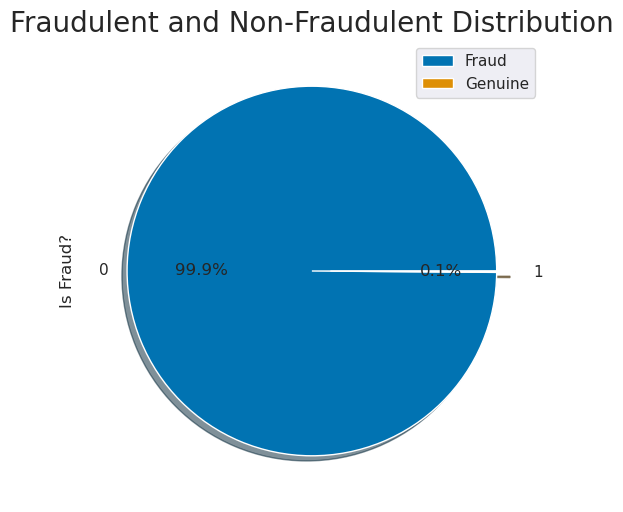

In [4]:
df["Is Fraud?"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()

## Subsampling

In [5]:
df_fraud = df[df["Is Fraud?"] == 1]
df_not_fraud = df[df["Is Fraud?"] == 0]
df_fraud_list = df_fraud.index.tolist()
df_not_fraud_list = df_not_fraud.index.tolist()
import random
random.seed(42)
df_fraud_rs_index = random.sample(df_fraud_list, int(len(df_fraud_list)*0.1))
df_fraud_rs = df_fraud.loc[df_fraud_rs_index]
df_not_fraud_rs_index = random.sample(df_not_fraud_list, int(len(df_not_fraud_list)*0.1))
df_not_fraud_rs = df_not_fraud.loc[df_not_fraud_rs_index]
df = pd.concat([df_not_fraud_rs,df_fraud_rs], axis=0).reset_index(drop=True)

## One Hot

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df = pd.concat([df, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [8]:
# Pour "day_of_week" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df[["day_of_week"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df = pd.concat([df, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [9]:
# Pour "Card Brand" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df[["Card Brand"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df = pd.concat([df, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [10]:
# Pour "Card Type" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df[["Card Type"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df = pd.concat([df, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

## Robust Scaler

In [11]:
selection = ['Card', 'Year', 'Month', 'Day', 'Hours', 'Amount',
       'Credit Limit', 'Year PIN last Changed',
       'delta_t_s', 'delta_t_s_card',
       'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_weekly_declines_card',
       'nb_monthly_declines_card', 'bad_pin', 'insufficient_balance',
       'hr_nbt/last_30d_av_hr_nbt', 'day_nbt/last_30d_av_day_nbt',
       'last_3d_amt/nbt', 'Chip Transaction',
       'Online Transaction', 'Swipe Transaction', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'Card Brand_Amex', 'Card Brand_Discover', 'Card Brand_Mastercard',
       'Card Brand_Visa', 'Card Type_Credit', 'Card Type_Debit',
       'Card Type_Debit (Prepaid)', 'Is Fraud?']

In [12]:
estimators = ['Card', 'Year', 'Month', 'Day', 'Hours', 'Amount',
       'Credit Limit', 'Year PIN last Changed',
       'delta_t_s', 'delta_t_s_card',
       'amt/daily_income', 'Retired', 'daily_amount',
       'nb_daily_declines_card', 'nb_weekly_declines_card',
       'nb_monthly_declines_card', 'bad_pin', 'insufficient_balance',
       'hr_nbt/last_30d_av_hr_nbt', 'day_nbt/last_30d_av_day_nbt',
       'last_3d_amt/nbt', 'Chip Transaction',
       'Online Transaction', 'Swipe Transaction', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'Card Brand_Amex', 'Card Brand_Discover', 'Card Brand_Mastercard',
       'Card Brand_Visa', 'Card Type_Credit', 'Card Type_Debit',
       'Card Type_Debit (Prepaid)']
df_selec = df[selection]
#df_selec = df_selec[np.isfinite(df_selec).all(1)]
X = df_selec[estimators]
y = df_selec["Is Fraud?"]



In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

## RobustScaler

In [14]:
from sklearn.preprocessing import RobustScaler

# Creating function for scaling
def Robust_Scaler (df, col_names):
    features = df[col_names]
    scaler = RobustScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [15]:
col_names = ['Card', 'Year', 'Month', 'Day', 'Hours', 'Amount',
       'Credit Limit', 'Year PIN last Changed',
       'delta_t_s', 'delta_t_s_card',
       'amt/daily_income', 'daily_amount',
       'nb_daily_declines_card', 'nb_weekly_declines_card',
       'nb_monthly_declines_card',
       'hr_nbt/last_30d_av_hr_nbt', 'day_nbt/last_30d_av_day_nbt',
       'last_3d_amt/nbt']
X_train = Robust_Scaler (X_train, col_names)
X_test = Robust_Scaler (X_test, col_names)

In [16]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (1707082, 38)
y_train -  (1707082,)
X_test -  (731607, 38)
y_test -  (731607,)


## LR with imbalanced data

In [17]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step


In [33]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [34]:
y_pred = logreg.predict(X_test)


In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.81      0.90    730714
           1       0.00      0.76      0.01       893

    accuracy                           0.81    731607
   macro avg       0.50      0.79      0.45    731607
weighted avg       1.00      0.81      0.90    731607



In [36]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[595216, 135498],
       [   214,    679]])

In [37]:
metrics.roc_auc_score(y_test , y_pred) 

0.7874630060476737

In [38]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.84962645, 0.15037355],
       [0.78209664, 0.21790336],
       [0.75802305, 0.24197695],
       ...,
       [0.78539462, 0.21460538],
       [0.84289156, 0.15710844],
       [0.9464345 , 0.0535655 ]])

AUC -  0.7874630060476737 



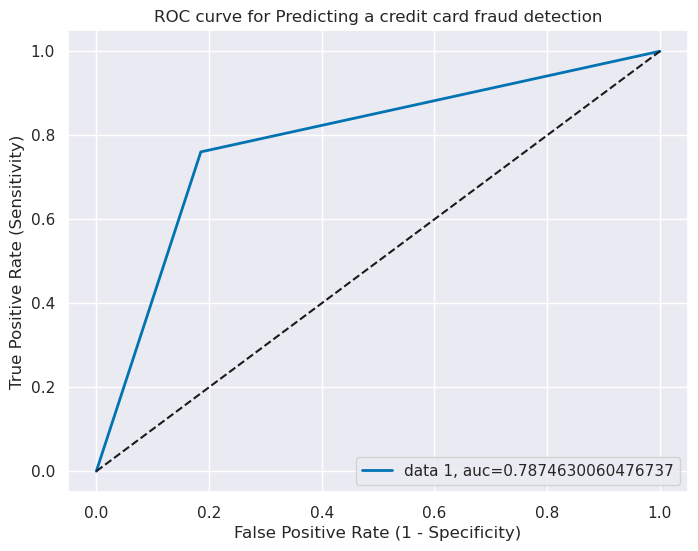

In [39]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Sampling techniques

In [18]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [19]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [20]:
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 1705000, 1: 2082})
Resampled dataset shape Counter({0: 2082, 1: 2082})


In [44]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rus))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91    730714
           1       0.01      0.75      0.01       893

    accuracy                           0.83    731607
   macro avg       0.50      0.79      0.46    731607
weighted avg       1.00      0.83      0.91    731607



AUC -  0.7882009870901983 



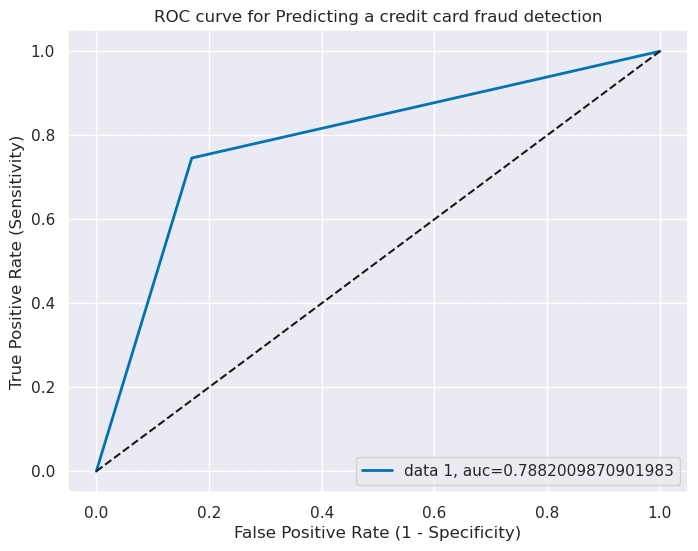

In [46]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [47]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
cnf_matrix

array([[606932, 123782],
       [   227,    666]])

### Oversampling

In [48]:
from imblearn.over_sampling import RandomOverSampler
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 1705000, 1: 2082})
Resampled dataset shape Counter({0: 1705000, 1: 1705000})


In [49]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [50]:
print(metrics.classification_report(y_test, y_pred_ros))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90    730714
           1       0.01      0.75      0.01       893

    accuracy                           0.83    731607
   macro avg       0.50      0.79      0.46    731607
weighted avg       1.00      0.83      0.90    731607



AUC -  0.788897300929808 



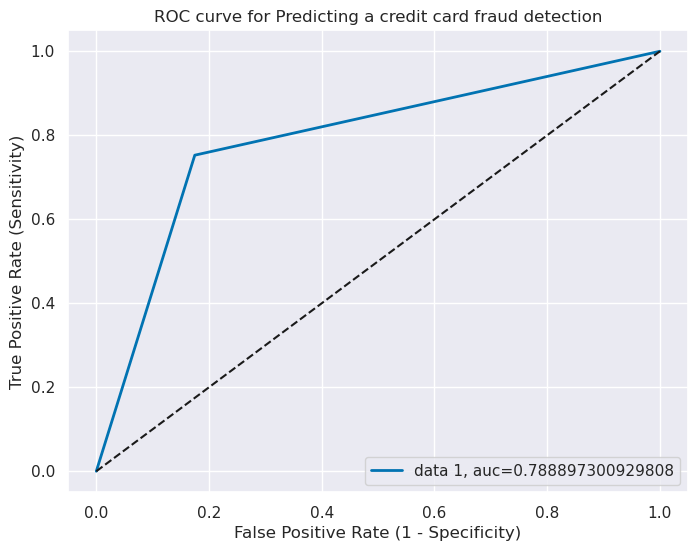

In [51]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [52]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
cnf_matrix

array([[603040, 127674],
       [   221,    672]])

### SMOTE

In [21]:
from imblearn.over_sampling import SMOTE, ADASYN

In [22]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 1705000, 1: 2082})
Resampled dataset shape Counter({0: 1705000, 1: 1705000})


In [31]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(C = 0.1, penalty = 'l2')
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [32]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    730714
           1       0.01      0.72      0.01       893

    accuracy                           0.84    731607
   macro avg       0.50      0.78      0.46    731607
weighted avg       1.00      0.84      0.91    731607



: 

AUC -  0.7817191034318882 



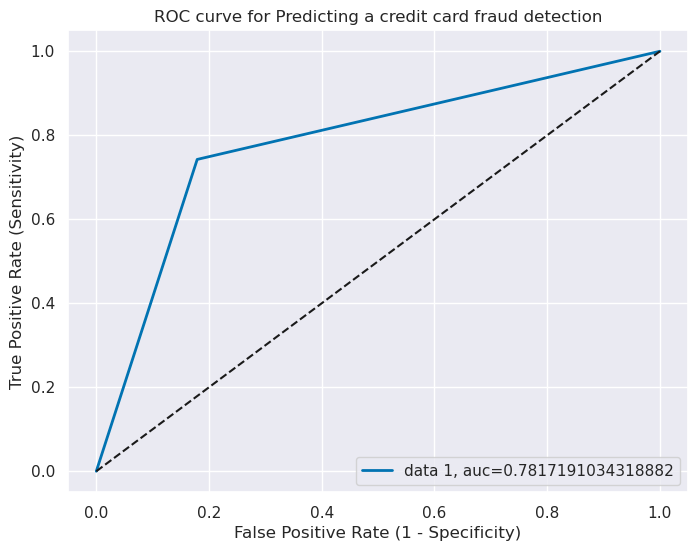

In [26]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
cnf_matrix

array([[599914, 130800],
       [   230,    663]])

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,'penalty':['l1','l2']
}

grid_lr = GridSearchCV(logreg, param_grid=params, cv=kf, 
                          scoring='f1').fit(X_train_smote, y_train_smote)

In [30]:
print('Best parameters:', grid_lr.best_params_)
print('Best score:', grid_lr.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.7902841998858402


### ADASYN

In [59]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 1705000, 1: 2082})
Resampled dataset shape Counter({1: 1705548, 0: 1705000})


In [60]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_adasyn, y_train_adasyn)

y_pred_adasyn = logreg.predict(X_test)

In [61]:
print(metrics.classification_report(y_test, y_pred_adasyn))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91    730714
           1       0.01      0.73      0.01       893

    accuracy                           0.83    731607
   macro avg       0.50      0.78      0.46    731607
weighted avg       1.00      0.83      0.91    731607



AUC -  0.781330972724124 



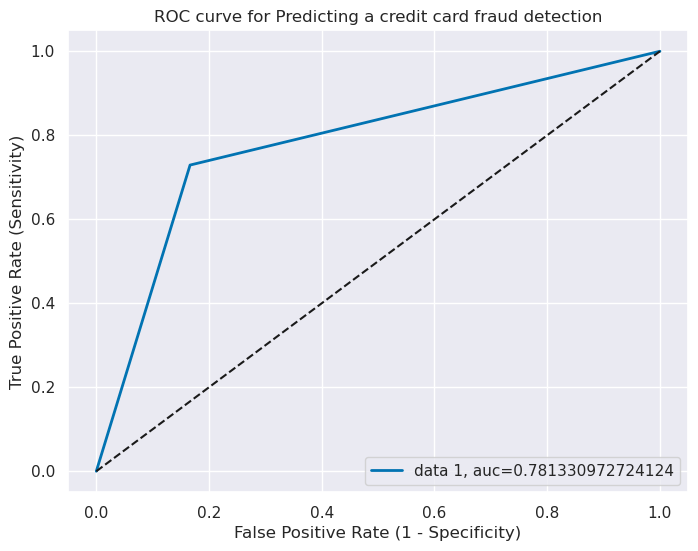

In [63]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

auc = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [64]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_adasyn)
cnf_matrix

array([[609166, 121548],
       [   242,    651]])